In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=15,
                                    width_shift_range=0.15,
                                    height_shift_range=0.15,
                                    shear_range=0.15,
                                    zoom_range=0.15,
                                    horizontal_flip=True,
                                  )
val_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
#Batch Size and Image Size
batch_sz = 64
sz = 48

train_generator = train_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Train',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

val_generator = val_datagen.flow_from_directory('../input/fer-dsc-v3/final_data_v5/final_data_v5/Test',
                                                    batch_size = batch_sz,
                                                    class_mode='categorical',
                                                    target_size=(sz,sz))

Found 13651 images belonging to 4 classes.
Found 1649 images belonging to 4 classes.


In [4]:
from keras.applications.vgg16 import VGG16

pre_model = VGG16(include_top = False,
                 weights = 'imagenet',
                 input_shape = (48,48,3))

58892288/58889256 [==============================] - 0s 0us/step


In [5]:
pre_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

In [6]:
for layer in pre_model.layers:
    layer.trainable=False
    
last_output = pre_model.get_layer('block4_conv1').output

In [7]:
x = tf.keras.layers.GlobalAveragePooling2D()(last_output)
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(256,activation='swish')(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128,activation= 'swish')(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(4,activation='softmax')(x)

model = tf.keras.Model(pre_model.input, x)

In [8]:
opt = tf.keras.optimizers.RMSprop(learning_rate=1e-6)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_generator,
                   validation_data=val_generator,
                    steps_per_epoch=train_generator.samples//train_generator.batch_size,
                   validation_steps=val_generator.samples//val_generator.batch_size,
                    epochs=30
                    )

Epoch 1/30
213/213 [==============================] - 43s 202ms/step - loss: 6.0108 - accuracy: 0.2542 - val_loss: 3.2358 - val_accuracy: 0.3106
Epoch 2/30
213/213 [==============================] - 26s 121ms/step - loss: 4.3398 - accuracy: 0.2647 - val_loss: 2.4752 - val_accuracy: 0.3269
Epoch 3/30
213/213 [==============================] - 24s 115ms/step - loss: 3.4813 - accuracy: 0.2815 - val_loss: 2.1046 - val_accuracy: 0.3438
Epoch 4/30
213/213 [==============================] - 26s 120ms/step - loss: 2.9060 - accuracy: 0.2853 - val_loss: 1.9049 - val_accuracy: 0.3575
Epoch 5/30
213/213 [==============================] - 24s 115ms/step - loss: 2.5369 - accuracy: 0.2951 - val_loss: 1.7613 - val_accuracy: 0.3613
Epoch 6/30
213/213 [==============================] - 25s 118ms/step - loss: 2.2530 - accuracy: 0.2890 - val_loss: 1.6434 - val_accuracy: 0.3544
Epoch 7/30
213/213 [==============================] - 25s 116ms/step - loss: 2.0031 - accuracy: 0.3004 - val_loss: 1.5386 - val_ac

In [9]:
for layer in model.layers:
    layer.trainable = True

In [10]:
opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(optimizer = opt1, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_generator,
                    validation_data = val_generator,
                    validation_steps = val_generator.samples // val_generator.batch_size,
                    epochs = 25)
                    #callbacks = [callbacks])

Epoch 1/25
214/214 [==============================] - 26s 123ms/step - loss: 1.3677 - accuracy: 0.3281 - val_loss: 1.2036 - val_accuracy: 0.4400
Epoch 2/25
214/214 [==============================] - 27s 126ms/step - loss: 1.2029 - accuracy: 0.4403 - val_loss: 1.0318 - val_accuracy: 0.5506
Epoch 3/25
214/214 [==============================] - 27s 124ms/step - loss: 1.0313 - accuracy: 0.5587 - val_loss: 0.9028 - val_accuracy: 0.6219
Epoch 4/25
214/214 [==============================] - 26s 121ms/step - loss: 0.9313 - accuracy: 0.6134 - val_loss: 0.8575 - val_accuracy: 0.6294
Epoch 5/25
214/214 [==============================] - 27s 127ms/step - loss: 0.8615 - accuracy: 0.6416 - val_loss: 0.7871 - val_accuracy: 0.6644
Epoch 6/25
214/214 [==============================] - 26s 119ms/step - loss: 0.8058 - accuracy: 0.6716 - val_loss: 0.7478 - val_accuracy: 0.6900
Epoch 7/25
214/214 [==============================] - 27s 125ms/step - loss: 0.7808 - accuracy: 0.6821 - val_loss: 0.7240 - val_ac

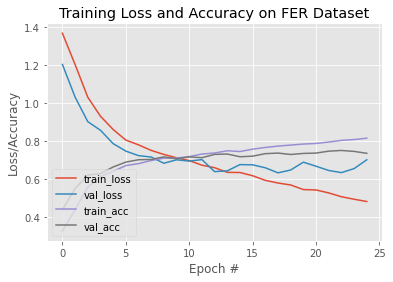

In [11]:
N = 25
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history1.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history1.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history1.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history1.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on FER Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [12]:
model.save('VGG_16_modified.h5')

model.save_weights('VGG16_modified_weights.h5')

In [13]:
test = '../input/fer-dsc-v3/final_data_v5/final_data_v5/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory (test, batch_size=256, class_mode='categorical', target_size=(48,48))

model.evaluate(test_generator, steps=4)

Found 1649 images belonging to 4 classes.
4/4 [==============================] - 0s 84ms/step - loss: 0.6930 - accuracy: 0.7432


[0.6930205821990967, 0.7431640625]